In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Paintings

## Get data

### Download data

Make sure to have opened Jupyter notebook in the project folder.

In [2]:
# download data in zip file
!curl https://www.wga.hu/database/download/data_txt.zip > data_txt.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1630k  100 1630k    0     0  34670      0  0:00:48  0:00:48 --:--:-- 93752:01:18  0:00:22  0:00:56 320756701      0  0:01:02  0:00:39  0:00:23 32062


In [3]:
# unzip downloaded data ands save it in a data folder
!unzip data_txt.zip -d data

Archive:  data_txt.zip
  inflating: data/catalog.csv        


If you don't have unzip installed (i.e. you receive an error like "unzip command not found" from the last cell), you can install it with `sudo apt install -y unzip`

In [4]:
# clean your directory
!rm data_txt.zip

### Import data in your notebook

In [5]:
path = os.path.join('data','catalog.csv')
df = pd.read_csv(path, encoding= 'unicode_escape') # take care of non-ASCII characters such as 'ö'

df.head(10)

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/html/a/aachen/adonis.html,painting,mythological,German,1601-1650
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/html/a/aachen/allegory.html,painting,mythological,German,1601-1650
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/html/a/aachen/allegorz.html,painting,mythological,German,1601-1650
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/antiope.html,painting,mythological,German,1601-1650
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/html/a/aachen/athena.html,painting,mythological,German,1601-1650
5,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Bacchus, Ceres and Cupid",1595-1605,"Oil on canvas, 163 x 113 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/bacchus.html,painting,mythological,German,1601-1650
6,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Bacchus, Venus and Cupid",1595-1600,"Oil on canvas, 63 x 50 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/bacchus1.html,painting,mythological,German,1601-1650
7,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",David and Bathsheba,1612-15,"Oil on canvas, 128 x 105 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/davidbat.html,painting,historical,German,1601-1650
8,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",The Amazement of the Gods,1590s,"Oil on copper, 36 x 46 cm","National Gallery, London",https://www.wga.hu/html/a/aachen/gods.html,painting,mythological,German,1601-1650
9,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Pan and Selene,1600-05,"Oil on panel, 40 x 49 cm",Private collection,https://www.wga.hu/html/a/aachen/gods1.html,painting,mythological,German,1601-1650


In [6]:
len(df)

50575

## define labels

In [7]:
df["TYPE"].unique(), df["TYPE"].nunique()

(array(['mythological', 'historical', 'genre', 'portrait', 'landscape',
        'religious', 'other', 'interior', 'still-life', 'study'],
       dtype=object),
 10)

In [8]:
df["FORM"].unique(), df["FORM"].nunique()

(array(['painting', 'ceramics', 'sculpture', 'graphics', 'architecture',
        'stained-glass', 'metalwork', 'illumination', 'mosaic', 'others',
        'furniture', 'tapestry', 'glassware'], dtype=object),
 13)

In [9]:
df["FORM"].value_counts()

painting         32008
sculpture         6878
architecture      4480
graphics          4130
illumination      1636
mosaic             419
metalwork          408
tapestry           167
furniture          153
stained-glass      136
ceramics           113
glassware           37
others              10
Name: FORM, dtype: int64

In [10]:
df.dtypes # if we want to use the dates, we need to do some preprocessing

AUTHOR       object
BORN-DIED    object
TITLE        object
DATE         object
TECHNIQUE    object
LOCATION     object
URL          object
FORM         object
TYPE         object
SCHOOL       object
TIMEFRAME    object
dtype: object

In [11]:
df.isnull().sum() # we might have to check for other types of null values (maybe '', or '-')

AUTHOR       0
BORN-DIED    0
TITLE        0
DATE         0
TECHNIQUE    0
LOCATION     0
URL          0
FORM         0
TYPE         0
SCHOOL       0
TIMEFRAME    0
dtype: int64

### Initial preprocessing

We need to transform the URL (currently an html page) into the usual representation of an image (i.e. np.array of shape (width,height,channels)

#### Get link from html to jpg

The URL of the image is in html form. We need to adjust this URL to get the direct link to the image. This adjustment is based on how the website was built.

In [12]:
def get_jpg_link(html_link: str) -> str:
    """Tranform the html_link of the image to its respective jpg_link"""
    
    jpg_link = html_link.replace('html','art', 1).replace('html','jpg')
    
    return jpg_link

In [13]:
html_link_test = 'https://www.wga.hu/html/a/aachen/adonis.html'
get_jpg_link(html_link_test) # should return 'https://www.wga.hu/art/a/aachen/adonis.jpg'

'https://www.wga.hu/art/a/aachen/adonis.jpg'

#### Transform jpg to NumPy array

In [14]:
def jpg_to_array(jpg_link: str) -> np.ndarray:
    """Given an image jpg_link, it returns its vectorial representation"""
    
    img_vector = plt.imread(jpg_link, format='jpg')
    
    return img_vector

<class 'numpy.ndarray'> (1400, 1053, 3)


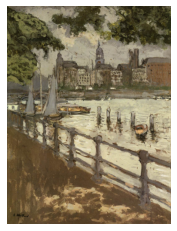

In [15]:
random_img_html = df.iloc[np.random.randint(0,len(df))]['URL']
random_img_jpg = get_jpg_link(random_img_html)
random_img_arr = jpg_to_array(random_img_jpg)

print(type(random_img_arr), random_img_arr.shape)

plt.imshow(random_img_arr)
plt.axis('off');

<class 'numpy.ndarray'> (904, 528, 3)


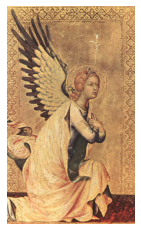

In [16]:
random_img_html = df.iloc[np.random.randint(0,len(df))]['URL']
random_img_jpg = get_jpg_link(random_img_html)
random_img_arr = jpg_to_array(random_img_jpg)

print(type(random_img_arr), random_img_arr.shape)

plt.imshow(random_img_arr)
plt.axis('off');

In [36]:
df["URL"][:1]

0    https://www.wga.hu/html/a/aachen/adonis.html
Name: URL, dtype: object

Run the above cell a few times. Notice how we have different sizes for different images! This is something we should probably take care of (maybe padding? Or size reduction?)

In [57]:
feat_lst = []
for i in df["URL"][:10]:
    random_img_html = df.iloc[np.random.randint(0,len(df))]['URL']
    random_img_jpg = get_jpg_link(random_img_html)
    random_img_arr = jpg_to_array(random_img_jpg)
    feat_lst.append(random_img_arr.shape)
print(feat_lst)

[(1200, 1003, 3), (840, 567, 3), (1200, 1037, 3), (1000, 1048, 3), (750, 979, 3), (1600, 1200, 3), (715, 619, 3), (1500, 872, 3), (900, 1037, 3), (1500, 1353, 3)]


### Clean Dataset and add pixel columns

dataset with only paintings

In [62]:
df_clean = df[df['FORM'].str.contains("painting")]
df_clean.shape

(32008, 11)

add additional column with pixel as target/y-values

In [73]:
s = df["TYPE"]
s.value_counts()

religious       20514
portrait         6210
other            6184
mythological     4646
landscape        4529
genre            3032
still-life       1441
study            1401
interior         1364
historical       1254
Name: TYPE, dtype: int64

In [74]:
pd.get_dummies(s).head()

,genre,historical,interior,landscape,mythological,other,portrait,religious,still-life,study
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


### Seve code preprocess

In [75]:
def get_jpg_link(html_link: str) -> str:
    """Tranform the html_link of the image to its respective jpg_link"""
    
    jpg_link = html_link.replace('html','art', 1).replace('html','jpg')
    
    return jpg_link

def jpg_to_array(jpg_link: str) -> np.ndarray:
    """Given an image jpg_link, it returns its vectorial representation"""
    
    img_vector = plt.imread(jpg_link, format='jpg')
    
    return img_vector

In [76]:
from sklearn.base import TransformerMixin, BaseEstimator

class ImageFromHtml(TransformerMixin, BaseEstimator):
    """Adds IMAGE column, with vector representation of the image"""
    def __init__(self, url_col='URL'):
        self.url_col = url_col
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        """X is a df with url_col"""
        X_transformed = X.copy()
        X_transformed['IMAGE'] = X[self.url_col].map(get_jpg_link).map(jpg_to_array)
        return X_transformed

In [113]:
def resize_image(img,width=420,height=360):
    dim = (width, height)
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

class ImageResizer(TransformerMixin, BaseEstimator):
    def __init__(self, dim=(420,360), interpolation=cv2.INTER_AREA):
        self.dim = dim
        self.interpolation = interpolation
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        """X is a pd.DataFrame with IMAGE column having vector representation of the image"""
        X_transformed = X.copy()
        X_transformed['IMAGE'] = X['IMAGE'].map(resize_image)
        return X_transformed



### Minimal preprocessing 

Original Dimensions :  (800, 621, 3)
Resized Dimensions :  (440, 621, 3)


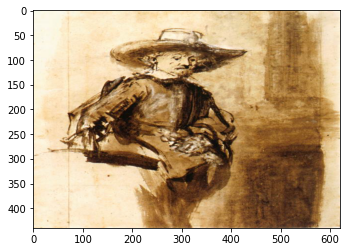

In [54]:
#cv2 resize image (height/weight)

print('Original Dimensions : ',random_img_arr.shape)

width = random_img_arr.shape[1]
height = 440
dim = (width, height)

# resize image
resized = cv2.resize(random_img_arr, dim, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

plt.imshow(resized)

### Built KNN 

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#take an input image, convert it to a (flattened) feature vector
def image_to_feature_vector(image, size=(32, 32)):
    # take resized image with fixed size and flatten image into a list of pixels
    pixels = cv2.resize(image, size).flatten()
    return pixels

In [65]:
df_clean.columns

Index(['AUTHOR', 'BORN-DIED', 'TITLE', 'DATE', 'TECHNIQUE', 'LOCATION', 'URL',
       'FORM', 'TYPE', 'SCHOOL', 'TIMEFRAME'],
      dtype='object')

In [ ]:
# define X and y
X = X_tranformed #and flattened

In [ ]:
# train-test-split, 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Cross-validation

In [117]:
for img in df["URL"][:10]:
    def resize_image(img,width=420,height=360):
    dim = (width, height)
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)



    random_img_html = df.iloc[np.random.randint(0,len(df))]['URL']
    random_img_jpg = get_jpg_link(random_img_html)
    random_img_arr = jpg_to_array(random_img_jpg)
    feat_lst.append(random_img_arr.shape)
print(feat_lst)

[(1200, 1003, 3), (840, 567, 3), (1200, 1037, 3), (1000, 1048, 3), (750, 979, 3), (1600, 1200, 3), (715, 619, 3), (1500, 872, 3), (900, 1037, 3), (1500, 1353, 3), (790, 1231, 3), (735, 600, 3), (900, 725, 3), (952, 733, 3), (900, 1089, 3), (800, 1035, 3), (1100, 922, 3), (1900, 1118, 3), (1300, 1013, 3), (1006, 701, 3), (804, 700), (700, 1568, 3), (1100, 864, 3), (823, 1030, 3), (1201, 900, 3), (1100, 752, 3), (894, 500, 3), (900, 1523, 3), (1063, 851, 3), (893, 1200, 3)]


In [ ]:
avg_scores = []  # average score for different k

max_k = 10
cv = 10

# loop over different values of k
for k in range(1, max_k):
  # create knn classifier with k = k
  knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

  # cross-validate knn on training sample with no_folds
  scores = cross_val_score(knn, data_train, label_train,
                           cv=cv, scoring='accuracy')

  # add avg accuracy to score table
  avg_scores.append(scores.mean())

In [ ]:
# plot 

plt.grid(True)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xlim([0, max_k])
plt.ylim([0, 1])
plt.xticks(range(0, max_k, 5))

plt.plot(range(1, max_k), avg_scores);

In [ ]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print(accuracy_score(label_test, prediction))



## Product ideas

### Paintings that look like pictures

The user takes a picture of something that he likes (e.g. a sunrise on the sea). The algorithm returns the painting that is most similar to the picture (e.g. _Impression, Sunrise_ by Claude Monet)

<table>
    <tr>
        <td style="text-align:center;font-size:15px"><strong>Uploaded by the user</strong></td>
        <td></td>
        <td style="text-align:center;font-size:15px"><strong>Returned by algorithm</strong></td>
    </tr>
    <tr>
        <td> <img src="https://pixnio.com/free-images/2017/10/17/2017-10-17-05-52-13.jpg" width="300"/> </td>
        <td>
            <img src="https://www.clipartkey.com/mpngs/m/38-380671_arrows-black-right-arrow-white-background.png" width="50"/>
        </td>
        <td> <img src="https://www.wga.hu/art/m/monet/03/0impress.jpg" width="300"/> </td>
    </tr>
</table>

In [ ]:
df[df['TITLE'] == 'Impression, Sunrise']

### Paintings recommender system

The user types the title of his favourite painting (e.g. `Impression, Sunrise`). The algorithm returns a list of other painting that are similar to the input and that the user might like.

<table>
    <tr>
        <td style="text-align:center;font-size:15px"><strong>Uploaded by the user</strong></td>
        <td></td>
        <td style="text-align:center;font-size:15px"><strong>Returned by algorithm</strong></td>
    </tr>
    <tr>
        <td style="text-align:center;font-size:26px">"Impression, Sunrise"</td>
        <td>
            <img src="https://www.clipartkey.com/mpngs/m/38-380671_arrows-black-right-arrow-white-background.png" width="50"/>
        </td>
        <td>
            <table>
                <tr>
                    <td>
                        <img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/ocean-sunrise-sandy-hemmer.jpg" width="150"/>
                    </td>
                    <td>
                        <img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/abstract-ocean-bay-sunrise-kathy-symonds.jpg" width="150"/>
                    </td>
                    <td>
                        <img src="https://i.pinimg.com/736x/d8/27/c0/d827c0d8164c3ffea31cdb36dad5eeb1.jpg" width="150"/>
                    </td>
                </tr>
            </table>
        </td>
    </tr>
</table>

### Any other idea?